## T5 Online Data Science Bootcamps for SDAIA Academy 

# Netflix 


Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details     such as - cast, directors, ratings, release year, duration, etc.



# Interesting Task Ideas
Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Does Netflix have more focus on TV Shows than movies in recent years?

# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# load dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Explore data analysis

In [4]:
# get some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# detect how many rows and columns
df.shape

(8807, 12)

In [6]:
# check how many null values in our data set
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum() # director && cast & country column has null value

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

we can drop director column

In [9]:
df2 = df.copy()

In [10]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df2.drop('director',inplace=True,axis=1)

In [12]:
df2.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df2.cast.fillna(df2.cast.mode()[0],inplace=True)

In [14]:
df2.isna().sum()

show_id           0
type              0
title             0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [15]:
df2.country.fillna(df2.country.mode()[0],inplace=True)

In [16]:
df2.isna().sum()

show_id          0
type             0
title            0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [17]:
df2.date_added.fillna(df2.date_added.mode()[0],inplace=True)

In [18]:
df2.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [19]:
df2.rating.fillna(df2.rating.mode()[0],inplace=True)

In [20]:
df2.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
df2.duration .fillna(df2.duration.mode()[0],inplace=True)

In [22]:
df2.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The dataset now is Clean with out any null value

In [23]:
df2.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Since release_year column is the only column with numerical values its the only column with an output. As we can see 1925(min) is the earliest relaese year of a movie or a Tv Show and we have the latest(max) release year being 2021

At this point what I'm basically trying do is answer the following questions:


# Most Popular director for netflix


In [26]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

# Total number of TV Shows


In [27]:
len(df[df["type"]=="TV Show"])

2676

# Total number of Movies

In [28]:
len(df[df["type"]=="Movie"])

6131

# let us look at the countries:

In [29]:
df2["country"].value_counts()

United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

# visualization

<AxesSubplot:>

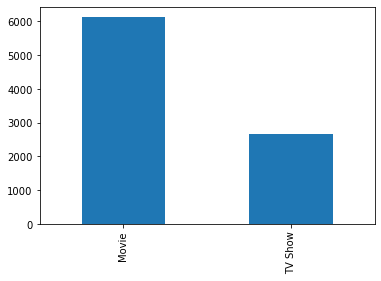

In [30]:
# What are the most popular types on the platform?
df2["type"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='date_added'>

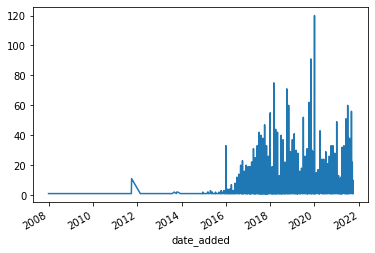

In [31]:
# What are the most date_added on the platform?
df2.groupby("date_added").size().plot(kind="line") 

<AxesSubplot:>

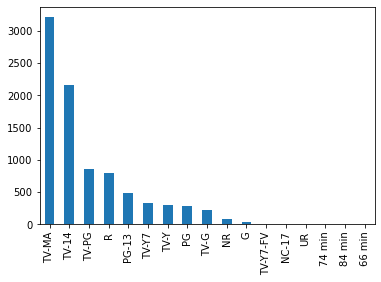

In [32]:
# What are the most rating on the platform?
df2["rating"].value_counts().plot(kind="bar")

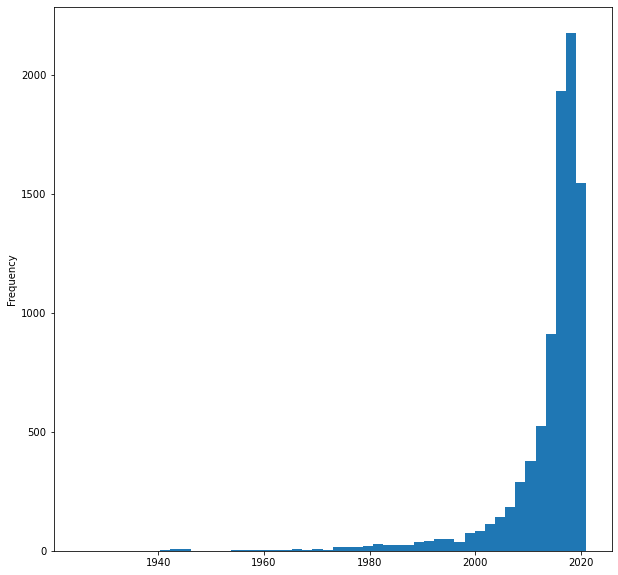

In [33]:
# What are the most release year on the platform?
df2.release_year.plot(kind="hist",bins=50,figsize=(10,10)) 
plt.show() 

# Preprocessing for modeling

In [34]:
df2.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df2.drop(columns=['show_id','date_added','rating', 'description'],inplace=True)

In [36]:
df2.head()

,type,title,cast,country,release_year,duration,listed_in
0,Movie,Dick Johnson Is Dead,David Attenborough,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,David Attenborough,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [37]:
df2 = pd.get_dummies(df,drop_first=True)

In [38]:
df2.head()

,release_year,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
0,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split Data

In [39]:
# detect input and output
X = df2.drop('release_year',axis=1)
X

,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,show_id_s1007,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y= df2.release_year
y

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [41]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

,show_id_s10,show_id_s100,show_id_s1000,show_id_s1001,show_id_s1002,show_id_s1003,show_id_s1004,show_id_s1005,show_id_s1006,show_id_s1007,...,description_Yılmaz Erdoğan's lauded stage play traces the life of wunderkind Gülseren as she navigates social and political change.,"description_Zack Snyder and his ""Army of the Dead"" team dive into the film's wild stunts, groundbreaking effects and the evolution of the zombie genre.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise.","description_Zoe Walker leaves her quiet life behind to investigate her brother's disappearance in Ibiza, where she quickly heads down a decadent and dangerous path.",description_“Last Chance U” hits the hardwood in East Los Angeles as a coach with strong convictions leads young men who hope to fulfill major college potential.
5471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_test_scaled

array([[-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       ...,
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149]])

In [45]:
X_train_scaled

array([[-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       ...,
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149],
       [-0.0119149,  0.       , -0.0119149, ...,  0.       , -0.0119149,
        -0.0119149]])

# Modeling

In [46]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

C:\Users\halbh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = lr.predict(X_test_scaled)

In [48]:
y_pred

array([2019, 2020, 2016, ..., 2013, 2017, 2021], dtype=int64)

In [49]:
y_test

4970    2018
3362    2019
5494    2017
1688    2020
1349    2012
        ... 
6844    1990
4447    2006
7974    2013
7146    2017
3320    2013
Name: release_year, Length: 1762, dtype: int64

# Model evaluation 

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        1925       0.00      0.00      0.00         0
        1942       0.00      0.00      0.00         0
        1943       0.00      0.00      0.00         0
        1954       0.00      0.00      0.00         0
        1960       0.00      0.00      0.00         0
        1961       0.00      0.00      0.00         0
        1962       0.00      0.00      0.00         0
        1963       0.00      0.00      0.00         0
        1967       0.00      0.00      0.00         0
        1969       0.00      0.00      0.00         0
        1971       0.00      0.00      0.00         0
        1973       0.00      0.00      0.00         0
        1974       0.00      0.00      0.00         0
        1975       0.00      0.00      0.00         0
        1976       0.00      0.00      0.00         0
        1977       0.00      0.00      0.00         0
        1978       0.00      0.00      0.00         0
        1979       0.00    

C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# applay Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [52]:
y_pred_rf= rf.predict(X_test_scaled)

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

        1925       0.00      0.00      0.00         0
        1942       0.00      0.00      0.00         0
        1943       0.00      0.00      0.00         0
        1944       0.00      0.00      0.00         2
        1954       0.00      0.00      0.00         0
        1956       0.00      0.00      0.00         1
        1960       0.00      0.00      0.00         0
        1961       0.00      0.00      0.00         0
        1962       0.00      0.00      0.00         0
        1963       0.00      0.00      0.00         0
        1964       0.00      0.00      0.00         1
        1966       0.00      0.00      0.00         1
        1967       0.00      0.00      0.00         0
        1969       0.00      0.00      0.00         0
        1970       0.00      0.00      0.00         1
        1971       0.00      0.00      0.00         0
        1973       0.00      0.00      0.00         1
        1974       0.00    

C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [54]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_pred_knn = knn.predict(X_test_scaled)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

        1925       0.00      0.00      0.00         0
        1942       0.00      0.00      0.00         0
        1943       0.00      0.00      0.00         0
        1954       0.00      0.00      0.00         0
        1960       0.00      0.00      0.00         0
        1961       0.00      0.00      0.00         0
        1962       0.00      0.00      0.00         0
        1963       0.00      0.00      0.00         0
        1967       0.00      0.00      0.00         0
        1969       0.00      0.00      0.00         0
        1971       0.00      0.00      0.00         0
        1973       0.00      0.00      0.00         0
        1974       0.00      0.00      0.00         0
        1975       0.00      0.00      0.00         0
        1976       0.00      0.00      0.00         0
        1977       0.00      0.00      0.00         0
        1978       0.00      0.00      0.00         0
        1979       0.00    

C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\halbh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

During the Corona pandemic, the Netflix platform was able to occupy the throne of views during the ban, and it increased sales and views during this pandemic, reaching 200 million subscribers.

# Thanks